Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tiago Flora"
COLLABORATORS = "Chloe Go"

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [2]:
def hire_assistant(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    best = -float('inf') # We initialize the 'best' indicator by making it the smallest possible value
    n_hired = 0 # We initialize counting the number of hires
    
    for i in applicants: # We compare every applicant to what we store as the best, and replace 
        if i >= best:
            best = i
            n_hired += 1
    return(n_hired) # Output is the number we hired

In [3]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [4]:
import random # Import the random library to build different lists of applicants
def experimental_hires(N):
    """
    Input: Number of applicants
    
    Output: Average number of hires for a list with a number N of applicants
    """
    hires = [] # Initialize the list of hired applicants
    for i in range(100): # Get 100 different samples for every input list
        applicants = [] # Initialize what will be a random list of applicant scores
        
        for i in range(N): # Add a random score to the applicant score list
            n = random.randint(1,100*N)
            applicants.append(n)
        hires.append(hire_assistant(applicants)) # Add the hired applicants of that list to the hires list
    return(sum(hires)/len(hires)) # Return the average number of hires for a given number of applicants

In [5]:
experimental_hires(100)

5.06

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [6]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Initialize lists to store the number of hired applicants for every number of applicants in a range
exp_hires = []
analyt_hires = []
n_applicants = list(range(100))

for i in range(100):
    # Add the number of hired applicants per number of applicants
    exp_hires.append(experimental_hires(i))
    analyt_hires.append(analytical_hires(i))

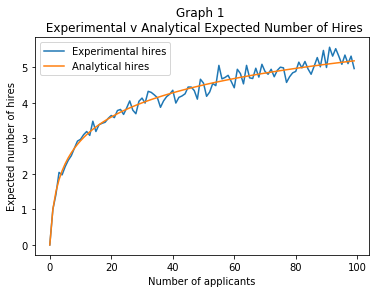

In [9]:
%matplotlib inline

plt.plot(n_applicants, exp_hires, label = "Experimental hires")
plt.plot(n_applicants, analyt_hires, label = "Analytical hires")

plt.xlabel('Number of applicants')
plt.ylabel('Expected number of hires')
plt.title('Graph 1 \n Experimental v Analytical Expected Number of Hires')
plt.legend()
plt.show()

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

In [10]:
def exp_one_hire(N):
    probabilities = [] # Initialize a list of probabilities 
    
    for j in range(1, 101): # Set a range for the number of experiments you wish to run
        hires = 0 # Start a hiring counter
        applicants = [] # Initialize the list of applicants again
        
        for i in range(N):
            n = random.randint(1,100*N)
            applicants.append(n)
            
        # We count all the lists that are created where the hiring process will only return one hired applicant
        if hire_assistant(applicants) == 1:
            hires += 1
        probabilities.append(hires/(N+1)) # Input all probabilities into the list
    return(sum(probabilities)/len(probabilities)) # Return an average probability of a hire

In [11]:
probs = []
analyt_probs = []

# Add probabilities from both the experimental and analytical approaches
for i in range(1, len(n_applicants)+1):
    probs.append(exp_one_hire(i))
    analyt_probs.append(1/(1+i))

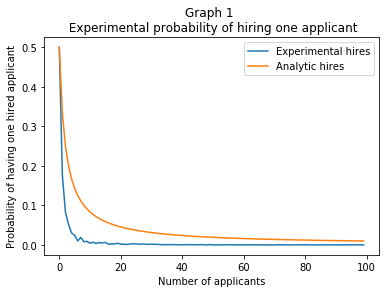

In [12]:
%matplotlib inline

plt.plot(n_applicants, probs, label = "Experimental hires")
plt.plot(n_applicants, analyt_probs, label = "Analytic hires")

plt.xlabel('Number of applicants')
plt.ylabel('Probability of having one hired applicant')
plt.title('Graph 1 \n Experimental probability of hiring one applicant')
plt.legend()
plt.show()

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [13]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

We wouldn't have to generate a random sample, but rather a shuffled version of the list of hats (i.e. a random order on which the hats are returned) to assess the average number of correctly returned hats.

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

The second command is the Pythonic way of implementing the shuffle we need. The numpy method used moves the objects inside hat_list and place them randomly, doing the shuffle we described in question 1. At first, the command generates a list of integers (potentially numbering hats by order of arrival), and then shuffles all those integers.


## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [14]:
import numpy as np

def hat_check(N):
    # Define a variable that will count how many hats were returned correctly for a given party size
    correct_hats = 0
    
    # Define a list that will span all party-goers and their hats
    hat_list = list(range(N))
    
    # Shuffle the list
    np.random.shuffle(hat_list)
    
    # Check if the shuffled  elements have the same index as their value, which would point to a hat being correct
    for i in hat_list:
        if hat_list[i] == i:
            correct_hats += 1
    return(correct_hats)

In [15]:
hat_check(100)

1

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

In [16]:
# Define variables for the number of trials and the party size
n_trials = 100
N = 100
hats = []

# Do a hat check for a range of party sizes a number of times to average them out
for i in range(n_trials):
    corr_hats = []
    for j in range(N):
        corr_hats.append(hat_check(i))
    hats.append(sum(corr_hats)/len(corr_hats))


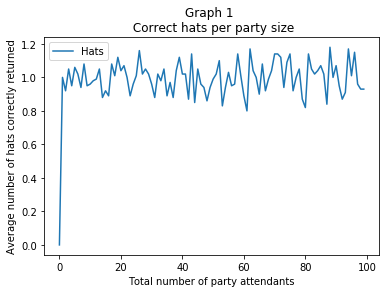

In [17]:
plt.plot(list(range(N)), hats, label = "Hats")

plt.xlabel('Total number of party attendants')
plt.ylabel('Average number of hats correctly returned')
plt.title('Graph 1 \n Correct hats per party size')
plt.legend()
plt.show()

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE